### EDA ###

**Imports**

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Chicago ###

**Reading In Data**

In [2]:
#original data:
chi_df_og = pd.read_csv('../data/chi_accidents.csv')

In [3]:
chi_df_og.head(3)

id  severity           start_time             end_time  start_lat  \
0  A-2749141         2  2016-11-30 14:46:48  2016-11-30 20:46:48  42.305960   
1  A-2749152         2  2016-11-30 14:58:59  2016-11-30 20:58:59  42.175870   
2  A-2749158         3  2016-11-30 15:14:24  2016-11-30 21:29:48  42.175897   

   start_lng    end_lat    end_lng  distance(mi)  \
0 -87.960150  42.306916 -87.960918         0.077   
1 -88.135770  42.174620 -88.135794         0.086   
2 -88.135769  42.174612 -88.135794         0.089   

                                         description   number  \
0  Between IL-137/Buckley Rd/Peterson Rd and IL-1...      NaN   
1                 At US-14/Northwest Hwy - Accident.  21500.0   
2  Between IL-22 and US-14/Northwest Hwy - Accident.  21501.0   

            street side          city county state     zipcode country  \
0  N Milwaukee Ave    R  Libertyville   Lake    IL       60048      US   
1    N IL Route 59    L    Barrington   Lake    IL  60010-2457      US   
2    N IL Route 59    R    Barrington   Lake    IL  60010-2456      US   

     timezone airport_code    weather_timestamp  temperature(f)  \
0  US/Central         KUGN  2016-11-30 14:55:00            37.0   
1  US/Central         KPWK  2016-11-30 14:52:00            37.0   
2  US/Central         KPWK  2016-11-30 14:52:00            37.0   

   wind_chill(f)  humidity(%)  pressure(in)  visibility(mi) wind_direction  \
0           31.0         79.0         29.59            10.0           West   
1           28.1         76.0         29.62            10.0           West   
2           28.1         76.0         29.62            10.0           West   

   wind_speed(mph)  precipitation(in) weather_condition  amenity   bump  \
0              8.1                NaN          Overcast    False  False   
1             15.0                NaN          Overcast    False  False   
2             15.0                NaN          Overcast    False  False   

   crossing  give_way  junction  no_exit  railway  roundabout  station   stop  \
0     False     False     False    False    False       False    False  False   
1     False     False     False    False    False       False    False  False   
2     False     False     False    False    False       False    False  False   

   traffic_calming  traffic_signal  turning_loop sunrise_sunset  \
0            False            True         False            Day   
1            False            True         False            Day   
2            False            True         False            Day   

  civil_twilight nautical_twilight astronomical_twilight  
0            Day               Day                   Day  
1            Day               Day                   Day  
2            Day               Day                   Day

In [4]:
chi_df_og.columns

Index(['id', 'severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'description', 'number', 'street',
       'side', 'city', 'county', 'state', 'zipcode', 'country', 'timezone',
       'airport_code', 'weather_timestamp', 'temperature(f)', 'wind_chill(f)',
       'humidity(%)', 'pressure(in)', 'visibility(mi)', 'wind_direction',
       'wind_speed(mph)', 'precipitation(in)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'turning_loop', 'sunrise_sunset', 'civil_twilight', 'nautical_twilight',
       'astronomical_twilight'],
      dtype='object')

In [5]:
#cleaned data:
chi_df = pd.read_csv('../data/chi_df_model_ready.csv')

In [6]:
chi_df.head(3)

severity    start_time      end_time  start_lat  start_lng    end_lat  \
0         2  1.480517e+09  1.480539e+09  42.305960 -87.960150  42.306916   
1         2  1.480518e+09  1.480540e+09  42.175870 -88.135770  42.174620   
2         3  1.480519e+09  1.480541e+09  42.175897 -88.135769  42.174612   

     end_lng  distance(mi)   number side airport_code  weather_timestamp  \
0 -87.960918         0.077      0.0    R         KUGN       1.480518e+09   
1 -88.135794         0.086  21500.0    L         KPWK       1.480518e+09   
2 -88.135794         0.089  21501.0    R         KPWK       1.480518e+09   

   temperature(f)  wind_chill(f)  humidity(%)  pressure(in)  visibility(mi)  \
0            37.0           31.0         79.0         29.59            10.0   
1            37.0           28.1         76.0         29.62            10.0   
2            37.0           28.1         76.0         29.62            10.0   

   wind_speed(mph)  precipitation(in)  amenity  bump  crossing  give_way  \
0              8.1                0.0        0     0         0         0   
1             15.0                0.0        0     0         0         0   
2             15.0                0.0        0     0         0         0   

   junction  no_exit  railway  roundabout  station  stop  traffic_calming  \
0         0        0        0           0        0     0                0   
1         0        0        0           0        0     0                0   
2         0        0        0           0        0     0                0   

   traffic_signal  turning_loop  wind_direction_Calm  wind_direction_E  \
0               1             0                    0                 0   
1               1             0                    0                 0   
2               1             0                    0                 0   

   wind_direction_ENE  wind_direction_ESE  wind_direction_East  \
0                   0                   0                    0   
1                   0                   0                    0   
2                   0                   0                    0   

   wind_direction_N  wind_direction_NE  wind_direction_NNE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_NNW  wind_direction_NW  wind_direction_North  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   

   wind_direction_S  wind_direction_SE  wind_direction_SSE  \
0                 0                  0                   0   
1                 0                  0                   0   
2                 0                  0                   0   

   wind_direction_SSW  wind_direction_SW  wind_direction_South  \
0                   0                  0                     0   
1                   0                  0                     0   
2                   0                  0                     0   

   wind_direction_VAR  wind_direction_Variable  wind_direction_W  \
0                   0                        0                 0   
1                   0                        0                 0   
2                   0                        0                 0   

   wind_direction_WNW  wind_direction_WSW  wind_direction_West  \
0                   0                   0                    1   
1                   0                   0                    1   
2                   0                   0                    1   

   wind_direction_nan  weather_condition_Clear  weather_condition_Cloudy  \
0                   0                        0                         0   
1                   0                        0                         0   
2                   0                        0                         0   

   weather_condition_Cloudy /

**EDA**

In [7]:
chi_df.columns[:40]

Index(['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'side', 'airport_code',
       'weather_timestamp', 'temperature(f)', 'wind_chill(f)', 'humidity(%)',
       'pressure(in)', 'visibility(mi)', 'wind_speed(mph)',
       'precipitation(in)', 'amenity', 'bump', 'crossing', 'give_way',
       'junction', 'no_exit', 'railway', 'roundabout', 'station', 'stop',
       'traffic_calming', 'traffic_signal', 'turning_loop',
       'wind_direction_Calm', 'wind_direction_E', 'wind_direction_ENE',
       'wind_direction_ESE', 'wind_direction_East', 'wind_direction_N',
       'wind_direction_NE', 'wind_direction_NNE'],
      dtype='object')

In [8]:
chi_df.shape

(42407, 118)

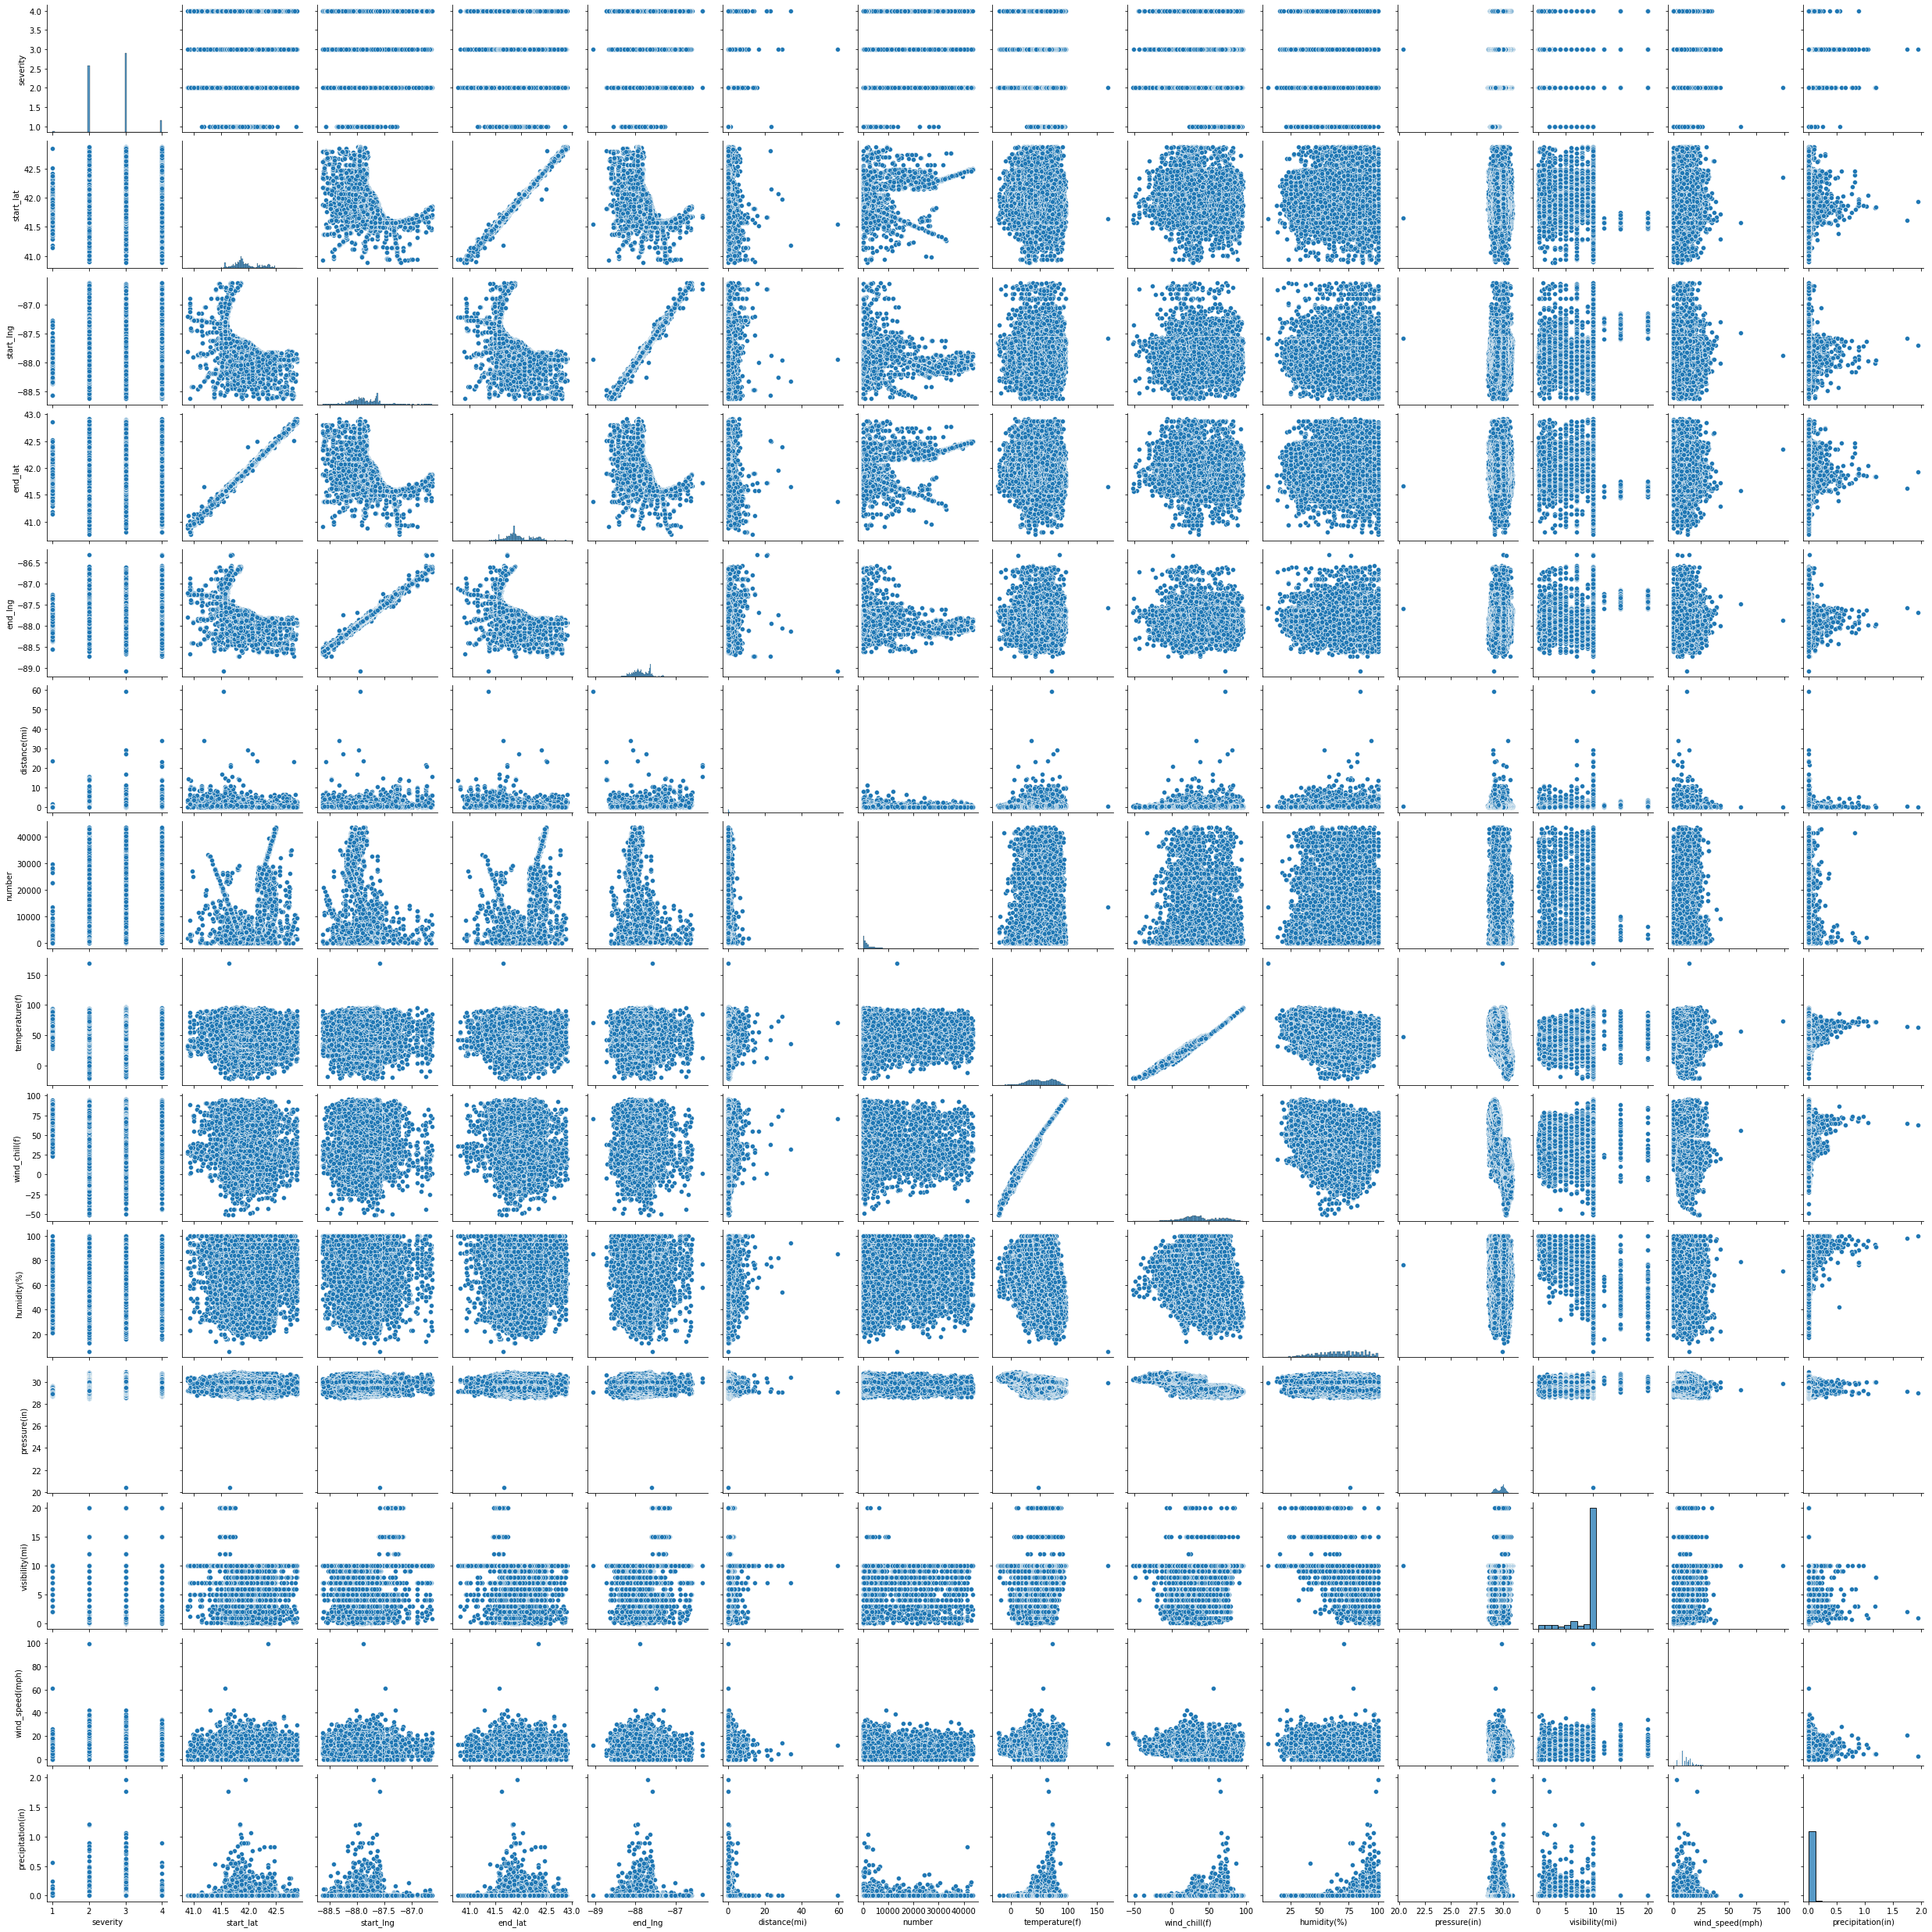

In [11]:
sns.pairplot(chi_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']])

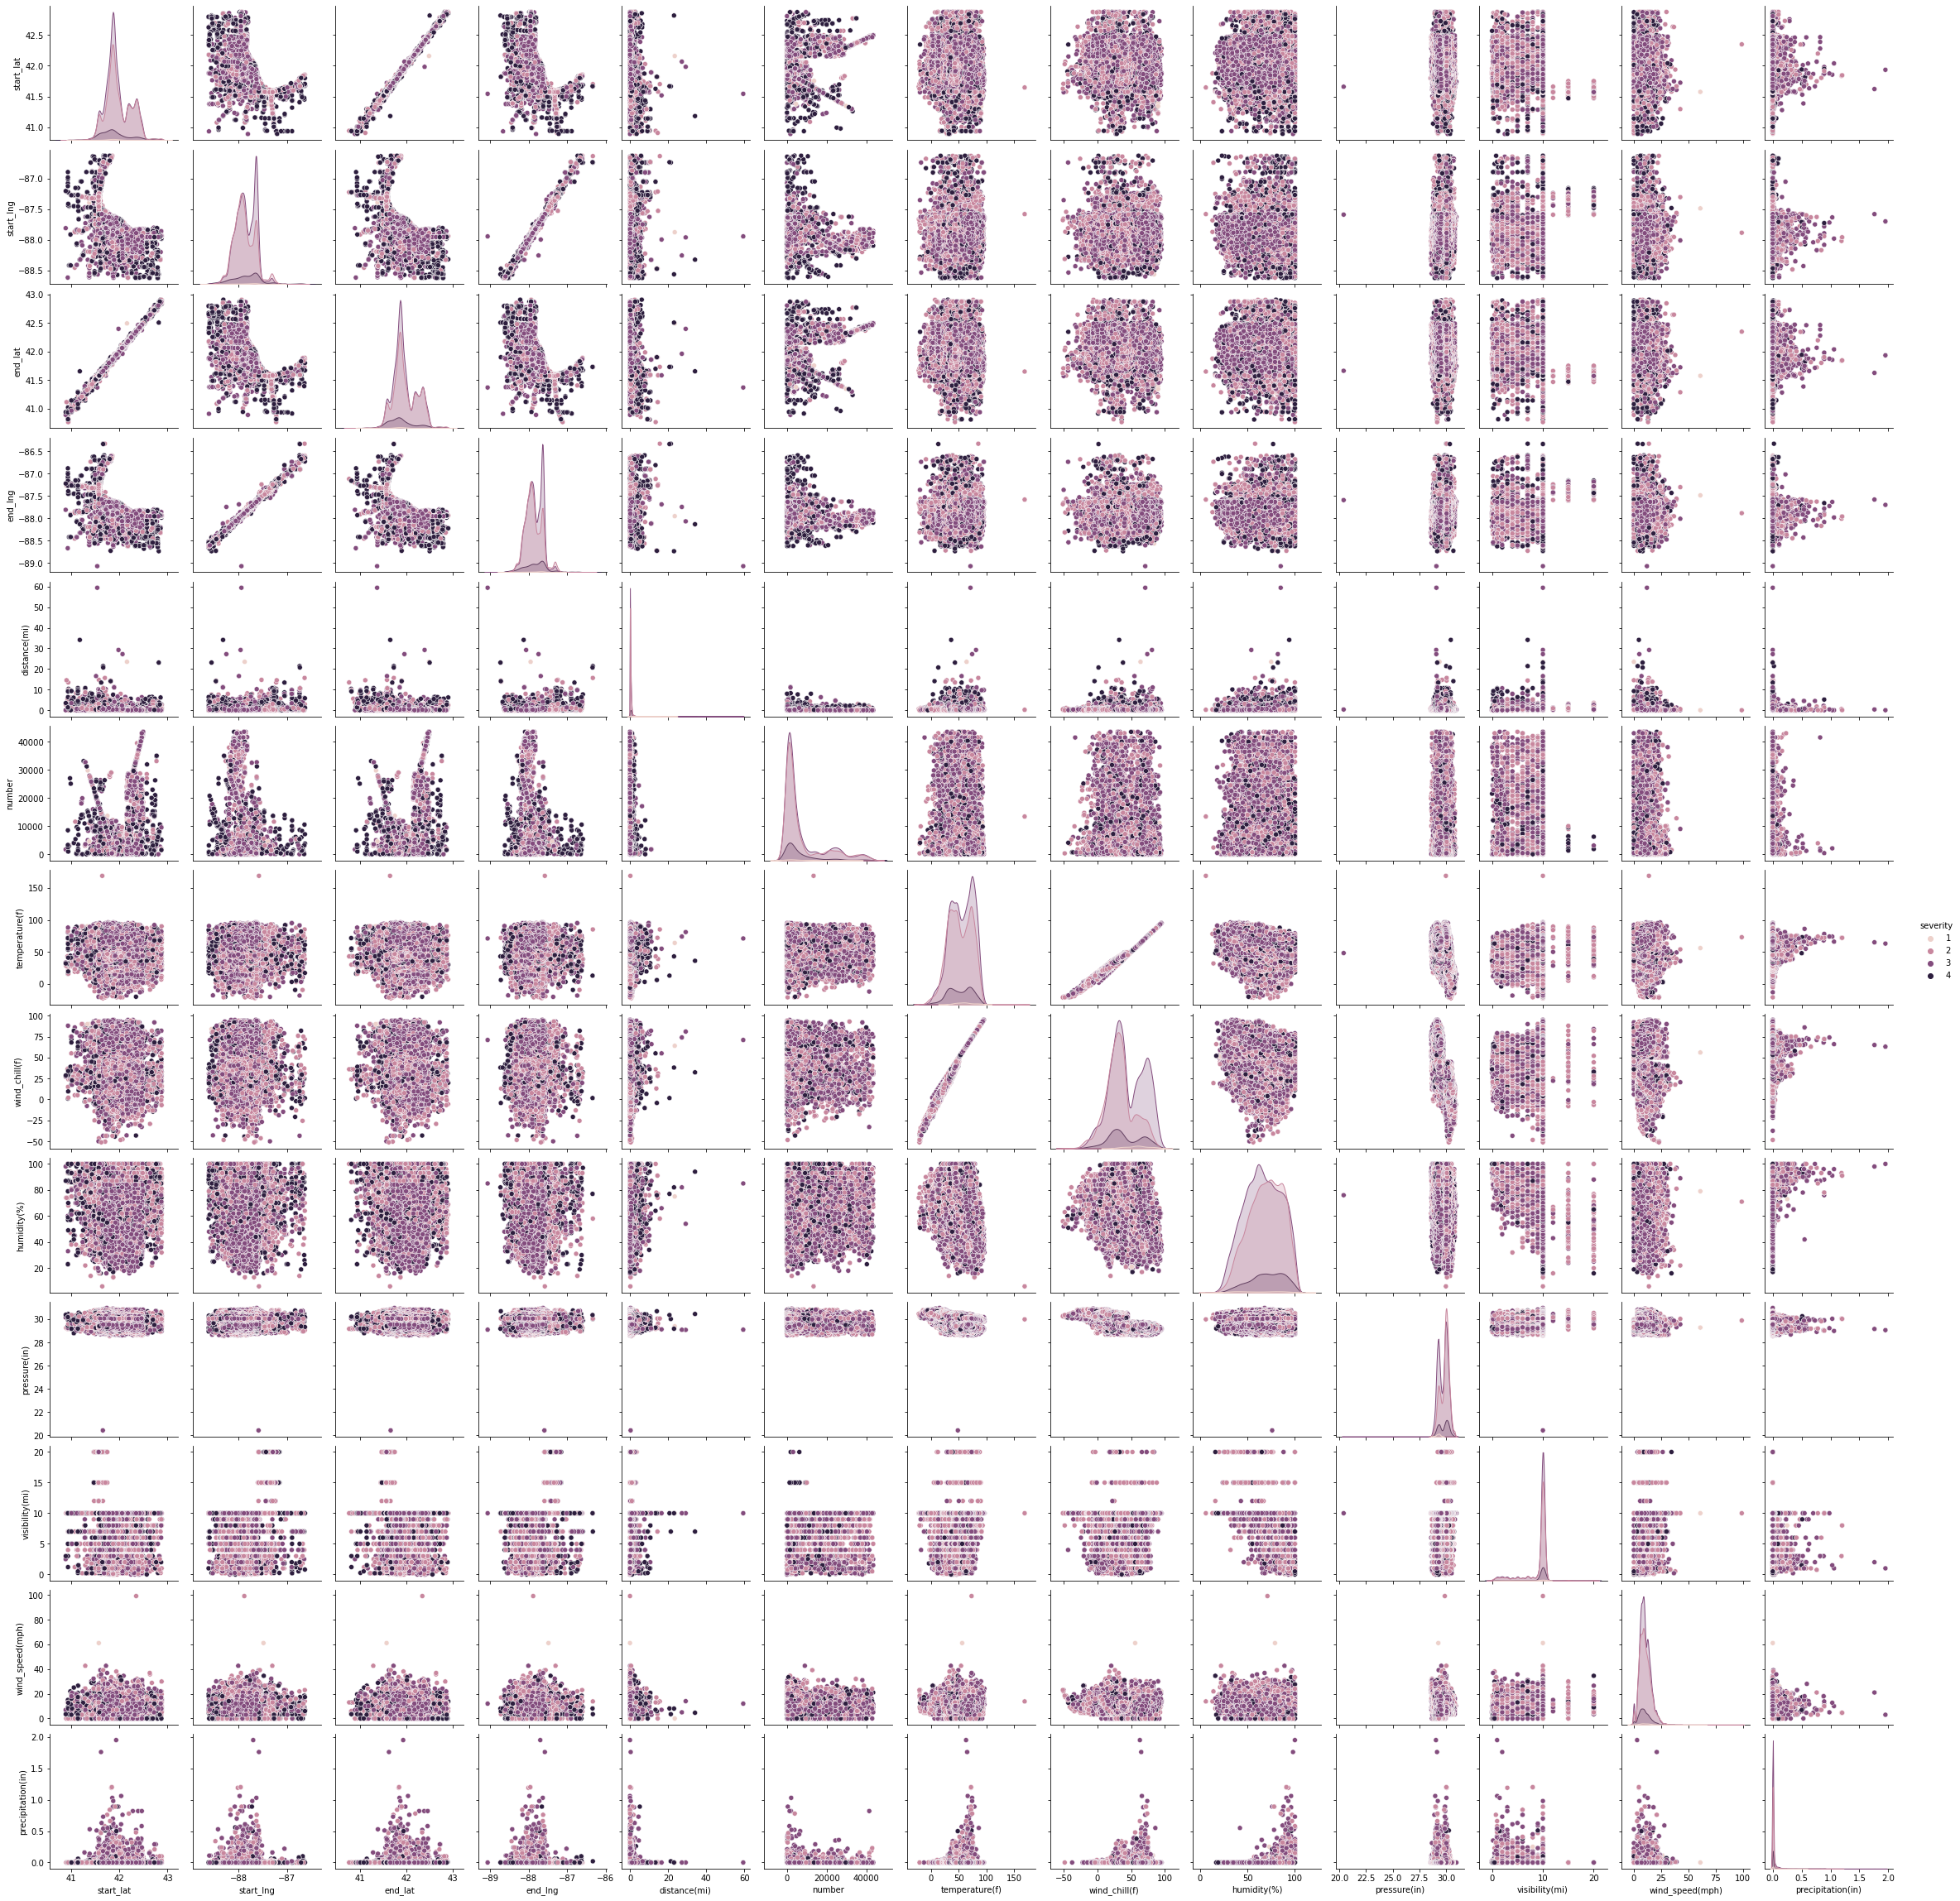

In [12]:
sns.pairplot(chi_df_og[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)']], hue = 'severity')

In [ ]:
plt.figure(figsize = (14, 14))
sns.heatmap(chi_df_og.corr(),
            annot = True,
            fmt = '.2f',
            linewidth = .1,
            vmin = -1,
            vmax = 1,
            cmap = 'viridis');

In [ ]:
chi_df.isna().sum().sort_values(ascending = False)

In [ ]:
#already addressed null values in cleaning, looking at duplicate values:
chi_df.duplicated(subset = ['severity', 'start_time', 'end_time',
                            'start_lat', 'start_lng','end_lat',
                            'end_lng', 'distance(mi)']).value_counts()

In [ ]:
duplicate = chi_df.duplicated()
chi_df[duplicate]

In [ ]:
chi_df.drop_duplicates(inplace = True)

In [ ]:
chi_df.shape

In [ ]:
chi_df[['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       'temperature(f)', 'wind_chill(f)', 'humidity(%)', 'pressure(in)',
       'visibility(mi)', 'wind_speed(mph)', 'precipitation(in)', 'accident_duration']].describe().drop('count').T